#Extracción de datos de la API  Football

 ---

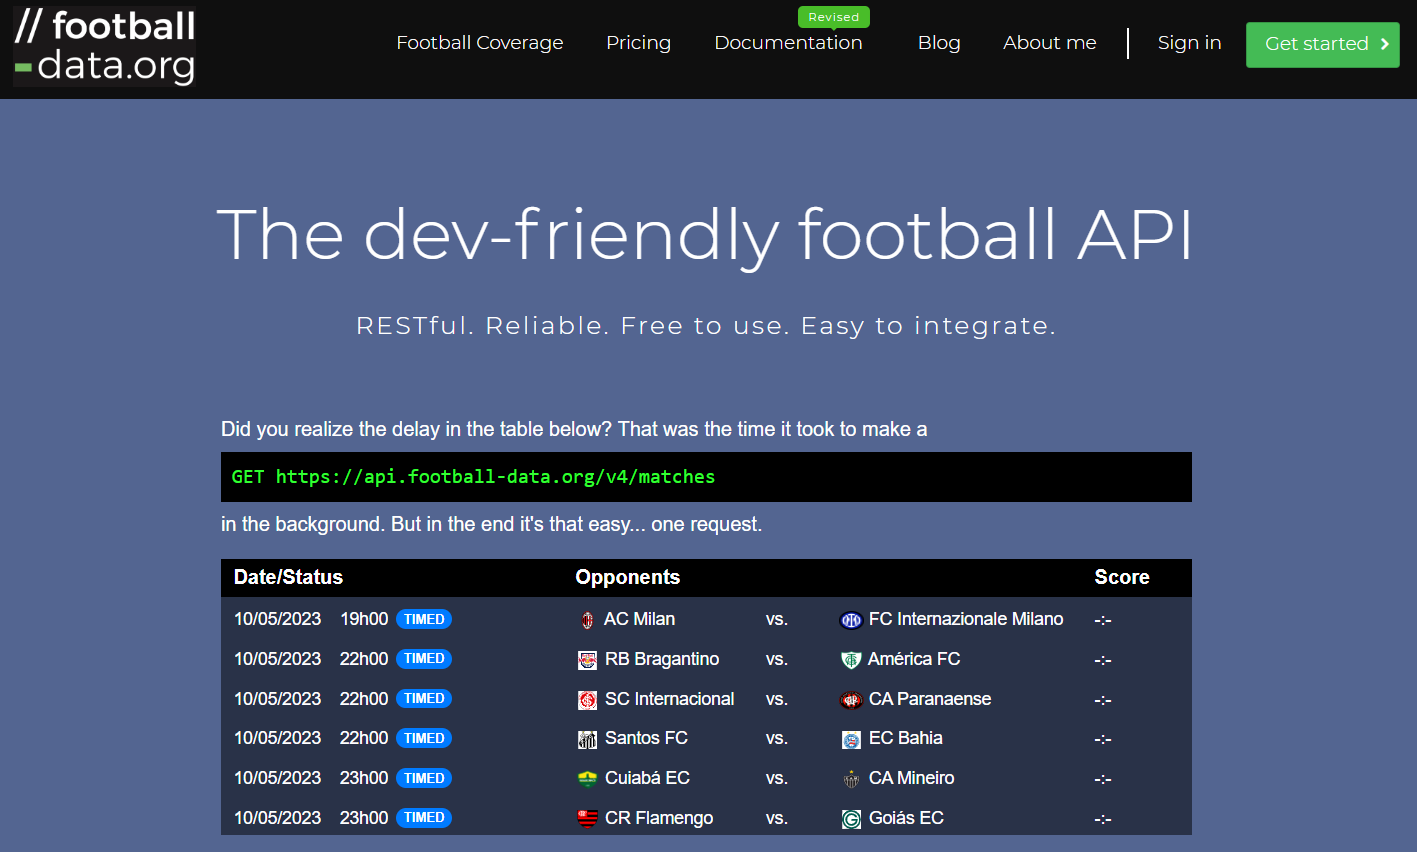

https://www.football-data.org/

###Primero debemos de crearnos una cuenta

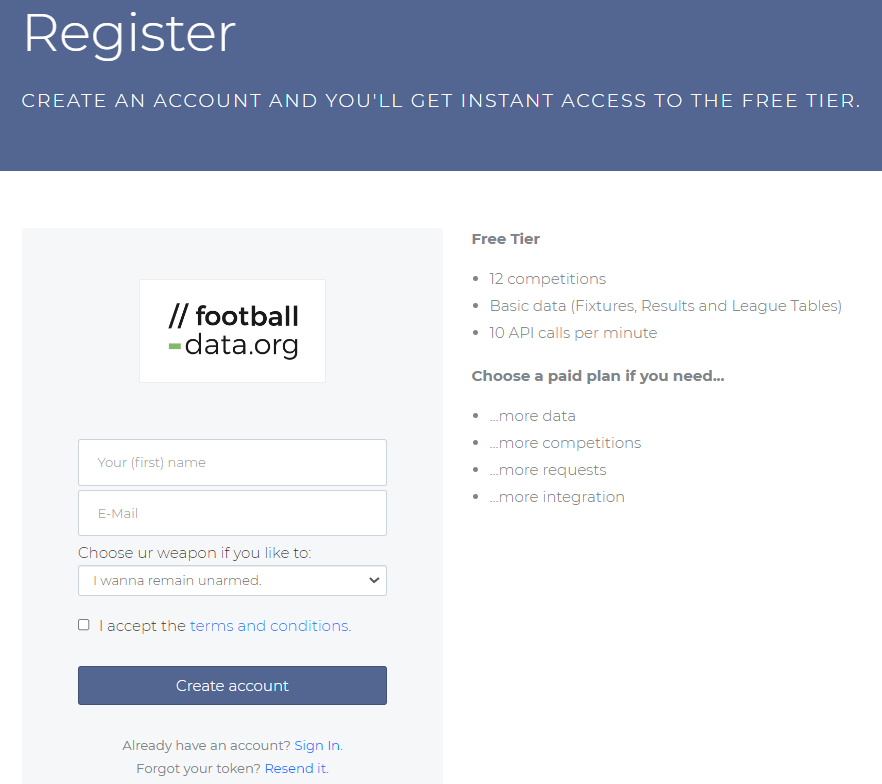

### Con el correo registrado , les llegará un mensaje con un API token, la cual la usarán para iniciar sesión.

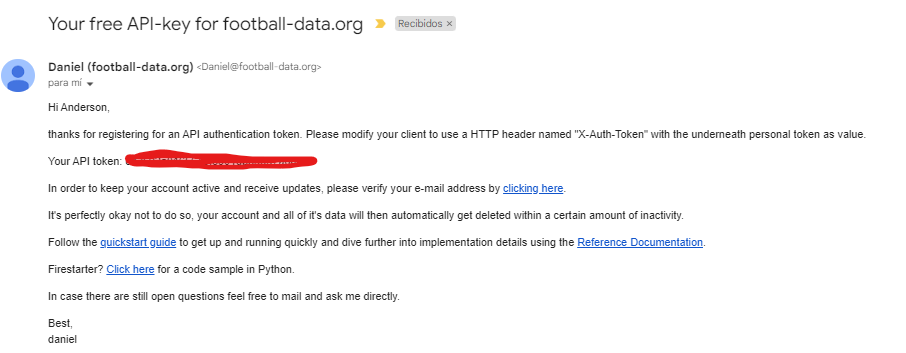

### Ahora si podemos ya iniciar sesión.

### Ahora nos dirigimos a la Documentación  y buscaremos Person/Match , es la que usaremos. 

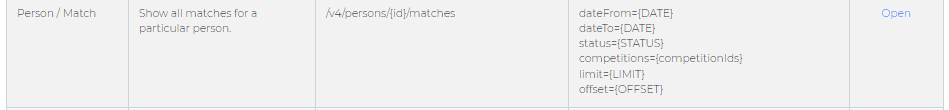

### Una vez elegido el recurso que utilizaremos, comenzamos con el código para obtener los datos.

In [78]:
#importamos las librerias necesarias
import http.client
import json

#Conectando  a la API
conexion = http.client.HTTPConnection("api.football-data.org")

#credenciales para conectar a la API football
headers = {"X-Auth-Token":"cd2592a0165643f8901db85957a600b3"}

#conexion.request("GET", "/v2/players/10/matches", None, headers) - esta codigo es solo para un jugador
#respuesta =json.loads(conexion.getresponse().read().decode())

In [79]:
#importamos la libreria numpy para poder hacer uso  y crear un array
import numpy as np

#creamos un array con 9 valores aleatorios entre 1 y 100 ( es decir para 9 jugadore aleatorios)
lista = np.random.randint(1, 100 , 9)

#listas vacias donde seran almacendas los datos extraidos por el iterador
id_match=[]
fechas = []
gol_local_primer_tiempo = []
gol_visita_primer_tiempo = []
gol_local_segundo_tiempo = []
gol_visita_segundo_tiempo = []
equipo_local = []
equipo_visita = []
ganador = []
nombre = []
apellido = []



for i in lista:
    conexion.request("GET", "/v2/players/%a/matches" % i, None, headers)  # Conexion con el recurso anteriormente elegido
    respuesta =json.loads(conexion.getresponse().read().decode()) 

    
    for player in range(0, len(respuesta["matches"])):

        id_match.append(respuesta["matches"][player]["id"])
        nombre.append(respuesta["player"]["firstName"])
        apellido.append(respuesta["player"]["lastName"])
        fechas.append(respuesta["matches"][player]["utcDate"])
        gol_local_primer_tiempo.append(respuesta["matches"][player]["score"]["halfTime"]["homeTeam"])
        gol_visita_primer_tiempo .append(respuesta["matches"][player]["score"]["halfTime"]["awayTeam"])
        gol_local_segundo_tiempo.append(respuesta["matches"][player]["score"]["fullTime"]["homeTeam"])
        gol_visita_segundo_tiempo .append(respuesta["matches"][player]["score"]["fullTime"]["awayTeam"])
        equipo_local.append(respuesta["matches"][player]["homeTeam"]["name"])
        equipo_visita.append(respuesta["matches"][player]["awayTeam"]["name"])
        ganador.append(respuesta["matches"][player]["score"]["winner"])



###usando el metodo "zip" unimos listas y creamos un dataframe con Pandas

In [81]:
lista_juntas = list(zip(id_match ,nombre, apellido, fechas , equipo_local, equipo_visita, gol_local_primer_tiempo, gol_local_segundo_tiempo, gol_visita_primer_tiempo, gol_visita_segundo_tiempo, ganador))

#importamos la libreria de pandas para poder crear el dataframe
import pandas as pd 

#creamos una lista con los nombres de las columnas
columnas = ["id","Nombre", "Apellido", "fecha", "Equipo Local", "Equipo Visita",
            "Gol local 1º tiempo", "Gol local 2º tiempo"
            ,"Gol visita 1º Tiempo", "Gol visita 2º Tiempo", "Ganador" ]

data = pd.DataFrame(lista_juntas , columns = columnas)
data

,id,Nombre,Apellido,fecha,Equipo Local,Equipo Visita,Gol local 1º tiempo,Gol local 2º tiempo,Gol visita 1º Tiempo,Gol visita 2º Tiempo,Ganador
0,273937,None,None,2020-07-19T19:00:00Z,Sevilla FC,Valencia CF,0,1,0,0,HOME_TEAM
1,273915,None,None,2020-07-12T15:00:00Z,Levante UD,Athletic Club,0,1,2,2,AWAY_TEAM
2,273909,None,None,2020-07-08T18:30:00Z,Getafe CF,Villarreal CF,0,1,0,3,AWAY_TEAM
3,273893,None,None,2020-07-02T17:30:00Z,SD Eibar,CA Osasuna,0,0,1,2,AWAY_TEAM
4,273891,None,None,2020-07-01T17:30:00Z,Deportivo Alavés,Granada CF,0,0,1,2,AWAY_TEAM
...,...,...,...,...,...,...,...,...,...,...,...
843,273649,Zouhair,Feddal,2019-10-20T12:00:00Z,Real Sociedad de Fútbol,Real Betis Balompié,2,3,1,1,HOME_TEAM
844,273640,Zouhair,Feddal,2019-10-04T19:00:00Z,Real Betis Balompié,SD Eibar,0,1,1,1,DRAW
845,273631,Zouhair,Feddal,2019-09-27T19:00:00Z,Villarreal CF,Real Betis Balompié,1,5,0,1,HOME_TEAM
846,273619,Zouhair,Feddal,2019-09-24T18:00:00Z,Real Betis Balompié,Levante UD,1,3,1,1,HOME_TEAM


##### Finalmente obtuvimos un Dataframe con los datos extraidos de la API de Football.

--------------------------------------------------
###Adicionalmente se podría hacer: 

*   Análisis Exploratorio de Datos
*   Categorizar las variables
*   Limpieza y validación de datos
*   Establecer relaciones
*   Usar modelos de Machine Learning

